In [1]:
# this is MuZero!
# https://arxiv.org/abs/1911.08265
# It works, but only for CartPole
# Would be happy if it worked for Follower or LunarLander
# Also, while it's written, it's not using mcts.
# Replace naive_search(which tries n**K) with mcts_search to use

In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline
import tensorflow as tf
import numpy as np
import gym
from tqdm import tqdm, trange
import os,sys
sys.path.append(os.getcwd())

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Make Follower work! Will give interview to anyone who does.
from muzero.follower import Follower
#env = Follower()
env = gym.make("CartPole-v0")
#env = gym.make("MountainCar-v0")
#nv = gym.make("LunarLander-v2")
#env = gym.make("Acrobot-v1")

from muzero.model import MuModel
m = MuModel(env.observation_space.shape, env.action_space.n, s_dim=64, K=5)
env.reset(), env.observation_space.shape, env.action_space.n

from muzero.game import Game, ReplayBuffer
from muzero.mcts import naive_search, mcts_search
replay_buffer = ReplayBuffer(100, 128, m.K)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
def play_game():
  import random
  game = Game(env, discount=0.99)
  while not game.terminal():
    #policy, _ = mcts_search(m, game.observation, 50)
    policy = naive_search(m, game.observation)
    game.act_with_policy(policy)
  return game

In [5]:
from muzero.model import reformat_batch
import collections

for j in range(30):
  game = play_game()
  replay_buffer.save_game(game)
  for i in range(10):
    m.train_on_batch(replay_buffer.sample_batch())
  print(len(game.history), sum(game.rewards), collections.Counter(game.history), m.losses[-1][0])

12 12.0 Counter({1: 10, 0: 2}) 152.81091
11 11.0 Counter({1: 8, 0: 3}) 84.3316
11 11.0 Counter({0: 10, 1: 1}) 87.33905
12 12.0 Counter({0: 11, 1: 1}) 74.77967
10 10.0 Counter({0: 10}) 57.041252
10 10.0 Counter({0: 10}) 40.921124
10 10.0 Counter({0: 9, 1: 1}) 25.023838
8 8.0 Counter({0: 8}) 19.419128
10 10.0 Counter({0: 10}) 12.422739
10 10.0 Counter({0: 7, 1: 3}) 9.701687
24 24.0 Counter({0: 12, 1: 12}) 26.930182
41 41.0 Counter({1: 21, 0: 20}) 185.14162
22 22.0 Counter({1: 12, 0: 10}) 99.80342
21 21.0 Counter({1: 11, 0: 10}) 139.31844
26 26.0 Counter({1: 13, 0: 13}) 144.27722
38 38.0 Counter({0: 20, 1: 18}) 145.73155
74 74.0 Counter({0: 39, 1: 35}) 177.68274
124 124.0 Counter({0: 67, 1: 57}) 401.47177
131 131.0 Counter({0: 71, 1: 60}) 882.3649
200 200.0 Counter({0: 102, 1: 98}) 1213.1669
161 161.0 Counter({1: 86, 0: 75}) 1240.3658
200 200.0 Counter({0: 101, 1: 99}) 1505.5386
200 200.0 Counter({1: 102, 0: 98}) 1748.5321
112 112.0 Counter({0: 60, 1: 52}) 1500.7853
120 120.0 Counter({1: 

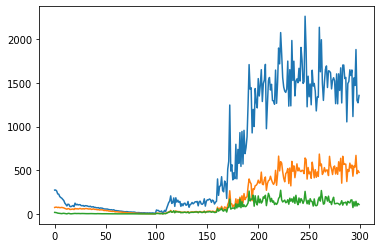

In [6]:
plot([x[0] for x in m.losses])
plot([x[1] for x in m.losses])
plot([x[-3] for x in m.losses])

In [7]:
# can act?
state = env.reset()
for sn in range(2000):
  p_0 = naive_search(m, state, debug=False)
  #p_0, _ = mcts_search(m, state, 50)
  a_1 = np.random.choice(list(range(len(p_0))), p=p_0)
  _, v_0 = m.ft(m.ht(state))
  
  env.render()
  state,r,done,_ = env.step(a_1)
  print(a_1, v_0, r, p_0)
  if done:
    print("DONE", sn)
    break

1 29.73876 1.0 [0.01363817 0.98636183]
0 31.832064 1.0 [0.99145269 0.00854731]
1 29.367374 1.0 [0.00758083 0.99241917]
0 31.545088 1.0 [0.98608599 0.01391401]
1 29.0457 1.0 [0.00465669 0.99534331]
0 31.299206 1.0 [0.97818532 0.02181468]
1 28.76597 1.0 [0.00309044 0.99690956]
0 31.087992 1.0 [0.96741139 0.03258861]
1 28.521093 1.0 [0.00217344 0.99782656]
0 30.90563 1.0 [0.95310712 0.04689288]
1 28.304567 1.0 [0.00159326 0.99840674]
0 30.74691 1.0 [0.93407 0.06593]
1 28.110374 1.0 [0.00120622 0.99879378]
0 30.607065 1.0 [0.90851782 0.09148218]
1 27.932821 1.0 [9.36872688e-04 9.99063127e-01]
0 30.481716 1.0 [0.87356725 0.12643275]
1 27.766476 1.0 [7.43254272e-04 9.99256746e-01]
0 30.36675 1.0 [0.8226936 0.1773064]
1 27.605974 1.0 [5.99343761e-04 9.99400656e-01]
0 30.258217 1.0 [0.75773136 0.24226864]
1 27.44589 1.0 [4.89520924e-04 9.99510479e-01]
0 30.152214 1.0 [0.67442512 0.32557488]
1 27.280563 1.0 [4.04616949e-04 9.99595383e-01]
1 30.04474 1.0 [0.56674309 0.43325691]
0 31.843657 1.0 [